In [137]:
import opendatasets as od

od.version()

'0.1.22'

In [138]:
dataset_url = "https://www.kaggle.com/jsphyg/weather-dataset-rattle-package"
# login
od.download(dataset_url, "../data")

Skipping, found downloaded files in "../data/weather-dataset-rattle-package" (use force=True to force download)


In [139]:
import os

data_dir = "../data/weather-dataset-rattle-package"
os.listdir(data_dir)
train_csv = data_dir + "/weatherAUS.csv"

In [140]:
import pandas as pd

raw_df = pd.read_csv(train_csv)
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [141]:
# Drop all rows with missing values in the 'RainTomorrow' column or 'RainToday' column
raw_df.dropna(subset=["RainTomorrow", "RainToday"], inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [142]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

train_df.shape, val_df.shape, test_df.shape

((84471, 23), (28158, 23), (28158, 23))

<Axes: title={'center': 'No. of Rows per Year'}, xlabel='Date', ylabel='count'>

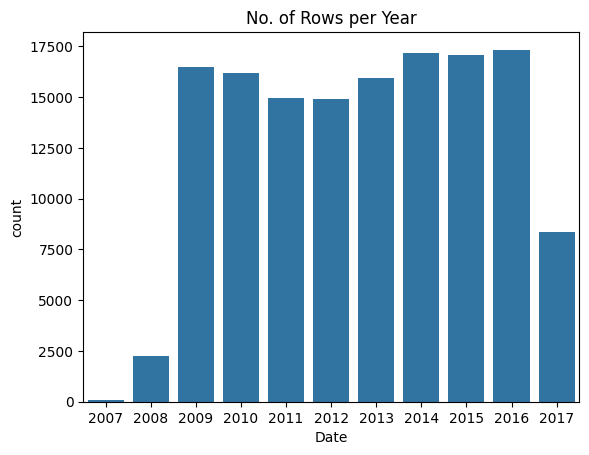

In [143]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.title("No. of Rows per Year")
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [144]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]
train_df.shape, val_df.shape, test_df.shape

((97988, 23), (17089, 23), (25710, 23))

In [145]:
input_cols = list(train_df.columns)[
    1:-1
]  # all columns except 'Date' and 'RainTomorrow'
target_col = "RainTomorrow"

In [146]:
# inputs and targets for training, validation and test sets
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [147]:
import numpy as np

numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes("object").columns.tolist()

In [148]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [149]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [150]:
# Impute missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
imputer.fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [151]:
train_inputs[numeric_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [152]:
# Scale numeric features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483675,0.525940,0.006396,0.036483,0.524759,0.265239,0.108402,0.215685,0.686287,0.514695,0.611797,0.608518,0.478106,0.490075,0.507070,0.517085
std,0.149457,0.131904,0.022962,0.021620,0.200930,0.102419,0.068800,0.101424,0.189008,0.206376,0.111333,0.106609,0.255395,0.237981,0.134722,0.130726
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.036483,0.524759,0.255814,0.100000,0.218391,0.690000,0.520000,0.611797,0.608518,0.478106,0.490075,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


In [153]:
# Encode categorical columns
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore')

In [154]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [155]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [156]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols]).toarray()
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols]).toarray()
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols]).toarray()

/var/folders/0s/dy02xm3n67g6qdlt8f81tl300000gp/T/ipykernel_19674/3240221198.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols]).toarray()
/var/folders/0s/dy02xm3n67g6qdlt8f81tl300000gp/T/ipykernel_19674/3240221198.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols]).toarray()
/var/folders/0s/dy02xm3n67g6qdlt8f81tl300000gp/T/ipykernel_19674/3240221198.py:1: PerformanceWarning

In [157]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,Albury,0.516509,0.523629,0.001617,0.036483,0.524759,W,0.294574,W,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.036483,0.524759,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.036483,0.524759,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.036483,0.524759,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Albury,0.613208,0.701323,0.002695,0.036483,0.524759,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.599057,0.718336,0.000000,0.036483,0.524759,SSE,0.286822,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144549,Uluru,0.556604,0.786389,0.000000,0.036483,0.524759,NE,0.193798,ENE,SW,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144550,Uluru,0.608491,0.805293,0.000000,0.036483,0.524759,ESE,0.255814,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144551,Uluru,0.674528,0.818526,0.000000,0.036483,0.524759,ESE,0.286822,ESE,SSW,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [158]:
# Saving the processed data to disk
train_inputs.shape, val_inputs.shape, test_inputs.shape

((97988, 123), (17089, 123), (25710, 123))

In [159]:
train_targets.shape, val_targets.shape, test_targets.shape

((97988,), (17089,), (25710,))

In [160]:
data_dir = "../data/scikit-learn/weather-dataset"
os.makedirs(data_dir, exist_ok=True)

train_inputs.to_parquet("../data/scikit-learn/weather-dataset/train_inputs.parquet")
val_inputs.to_parquet("../data/scikit-learn/weather-dataset/val_inputs.parquet")
test_inputs.to_parquet("../data/scikit-learn/weather-dataset/test_inputs.parquet")

In [161]:
# Read the processed data
train_inputs = pd.read_parquet(f"{data_dir}/train_inputs.parquet")
val_inputs = pd.read_parquet(f"{data_dir}/val_inputs.parquet")
test_inputs = pd.read_parquet(f"{data_dir}/test_inputs.parquet")

In [162]:
pd.DataFrame(train_targets).to_parquet(f"{data_dir}/train_targets.parquet")
pd.DataFrame(val_targets).to_parquet(f"{data_dir}/val_targets.parquet")
pd.DataFrame(test_targets).to_parquet(f"{data_dir}/test_targets.parquet")

In [163]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

train_preds = model.predict(train_inputs[numeric_cols + encoded_cols])
val_preds = model.predict(val_inputs[numeric_cols + encoded_cols])
test_preds = model.predict(test_inputs[numeric_cols + encoded_cols])

from sklearn.metrics import classification_report

print("Train Set:")
print(classification_report(train_targets, train_preds))

print("Validation Set:")
print(classification_report(val_targets, val_preds))

print("Test Set:")
print(classification_report(test_targets, test_preds))

Train Set:
              precision    recall  f1-score   support

          No       0.87      0.95      0.91     76190
         Yes       0.73      0.52      0.61     21798

    accuracy                           0.85     97988
   macro avg       0.80      0.73      0.76     97988
weighted avg       0.84      0.85      0.84     97988

Validation Set:
              precision    recall  f1-score   support

          No       0.87      0.96      0.91     13511
         Yes       0.74      0.46      0.57      3578

    accuracy                           0.85     17089
   macro avg       0.81      0.71      0.74     17089
weighted avg       0.84      0.85      0.84     17089

Test Set:
              precision    recall  f1-score   support

          No       0.86      0.95      0.90     19885
         Yes       0.73      0.48      0.58      5825

    accuracy                           0.84     25710
   macro avg       0.80      0.72      0.74     25710
weighted avg       0.83      0.84    

<Axes: xlabel='weight', ylabel='feature'>

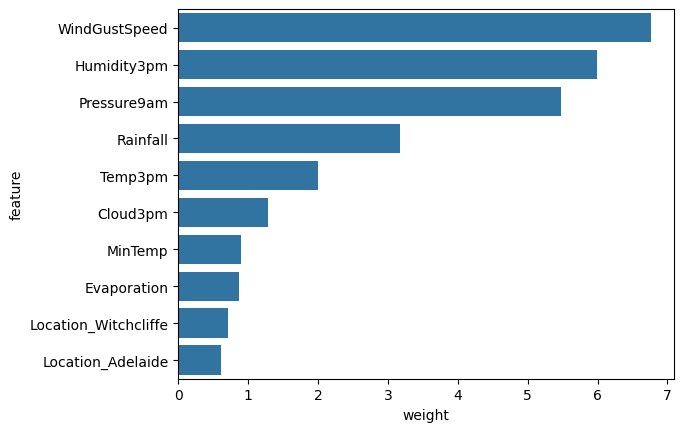

In [164]:
weight_df = pd.DataFrame(
    {"feature": numeric_cols + encoded_cols, "weight": model.coef_[0].tolist()}
).sort_values("weight", ascending=False)
sns.barplot(data=weight_df.head(10), x="weight", y="feature")

In [165]:
model.intercept_

array([-2.4477105])

In [166]:
# Making Predictions and Evaluating the Model
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [167]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [168]:
train_probs = model.predict_proba(X_train)
train_probs, model.classes_

(array([[0.94442543, 0.05557457],
        [0.94110037, 0.05889963],
        [0.96071655, 0.03928345],
        ...,
        [0.98750397, 0.01249603],
        [0.983366  , 0.016634  ],
        [0.87475401, 0.12524599]]),
 array(['No', 'Yes'], dtype=object))

In [169]:
from sklearn.metrics import accuracy_score

accuracy_score(train_targets, train_preds)

0.8518798220190228

In [170]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_targets, train_preds, normalize="true")

array([[0.94609529, 0.05390471],
       [0.47742912, 0.52257088]])

In [171]:
def predict_and_plot(inputs, targets, name=""):
    preds = model.predict(inputs)
    acc = accuracy_score(targets, preds)
    print(f"Accuracy: {acc*100:.2f}%")
    cf = confusion_matrix(targets, preds, normalize="true")
    plt.figure()
    sns.heatmap(
        cf, annot=True, xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"]
    )
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.title(f"Confusion Matrix ({name})")
    return preds

Accuracy: 85.19%


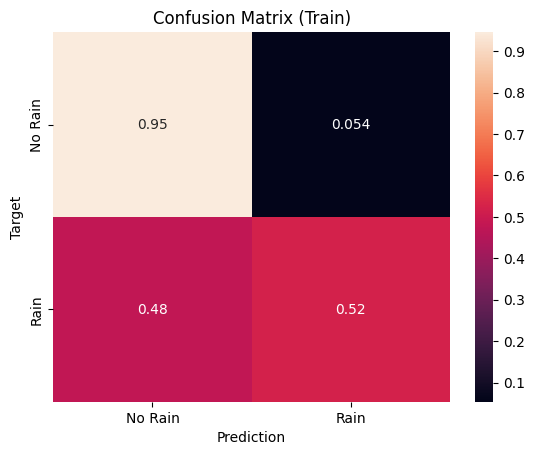

In [172]:
train_preds = predict_and_plot(X_train, train_targets, "Train")

Accuracy: 85.38%


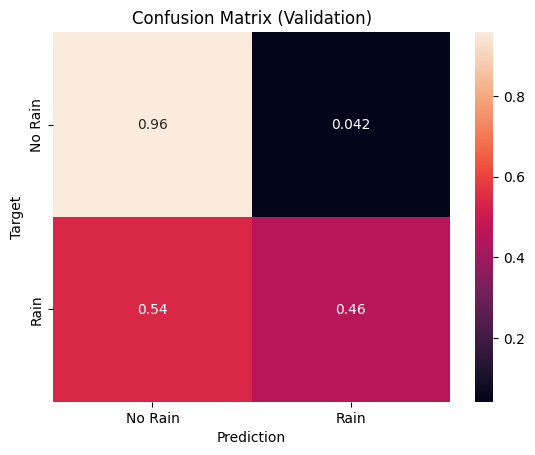

In [173]:
val_preds = predict_and_plot(X_val, val_targets, "Validation")

Accuracy: 84.22%


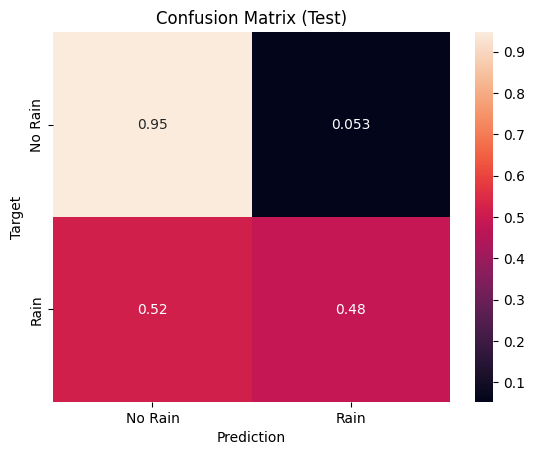

In [174]:
test_preds = predict_and_plot(X_test, test_targets, "Test")

In [175]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], size=len(inputs))

In [176]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [177]:
random_guess(X_val)

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype='<U3')

In [178]:
all_no(X_val)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

In [179]:
accuracy_score(test_targets, random_guess(X_test)), accuracy_score(
    test_targets, all_no(X_test)
)

(0.49879424348502527, 0.7734344612991054)

In [180]:
new_input = {
    "Date": "2021-06-19",
    "Location": "Katherine",
    "MinTemp": 23.2,
    "MaxTemp": 33.2,
    "Rainfall": 10.2,
    "Evaporation": 4.2,
    "Sunshine": np.nan,
    "WindGustDir": "NNW",
    "WindGustSpeed": 52.0,
    "WindDir9am": "NW",
    "WindDir3pm": "NNE",
    "WindSpeed9am": 13.0,
    "WindSpeed3pm": 20.0,
    "Humidity9am": 89.0,
    "Humidity3pm": 58.0,
    "Pressure9am": 1004.8,
    "Pressure3pm": 1001.5,
    "Cloud9am": 8.0,
    "Cloud3pm": 5.0,
    "Temp9am": 25.7,
    "Temp3pm": 33.0,
    "RainToday": "Yes",
}

In [181]:
new_input_df = pd.DataFrame([new_input])
new_input_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2021-06-19,Katherine,23.2,33.2,10.2,4.2,NaN,NNW,52.0,NW,...,20.0,89.0,58.0,1004.8,1001.5,8.0,5.0,25.7,33.0,Yes


In [182]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols]).toarray()

/var/folders/0s/dy02xm3n67g6qdlt8f81tl300000gp/T/ipykernel_19674/2648599453.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols]).toarray()
/var/folders/0s/dy02xm3n67g6qdlt8f81tl300000gp/T/ipykernel_19674/2648599453.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols]).toarray()
/var/folders/0s/dy02xm3n67g6qdlt8f81tl300000gp/T/ipykernel_19674/2648599453.py:3: PerformanceWarning

In [183]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,0.747642,0.718336,0.027493,0.028966,0.524759,0.356589,0.1,0.229885,0.89,0.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [184]:
pred = model.predict(X_new_input)[0]
pred

'Yes'

In [186]:
prob = model.predict_proba(X_new_input)[0]
prob

array([0.48085518, 0.51914482])

In [187]:
# Save the model
import joblib

aussie_rain = {
    "model": model,
    "imputer": imputer,
    "scaler": scaler,
    "encoder": encoder,
    "input_cols": input_cols,
    "target_col": target_col,
    "numeric_cols": numeric_cols,
    "categorical_cols": categorical_cols,
    "encoded_cols": encoded_cols,
}

In [188]:
joblib.dump(aussie_rain, "../models/aussie_rain.joblib")

['../models/aussie_rain.joblib']

In [190]:
# Load the model
aussie_rain = joblib.load("../models/aussie_rain.joblib")
aussie_rain2 = aussie_rain["model"]
test_preds2 = aussie_rain2.predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8422403733955659